In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
import seaborn as sns
import sklearn

# Описание работы
Измерение удовлетворенности клиентов является ключевым фактором для ведения современного бизнеса, поскольку оно может внести значительный вклад в повышение качества обслуживания. Чтобы соответствовать ожиданиям клиентов и достигать более высокого уровня качества, авиакомпаниям необходимо разработать конкретный механизм измерения удовлетворенности использования предоставленных авикомпанией услуг пассажиров. Таким образом, данная работа решает задачу классификацию удовлетворенности клиентов авиакомпаний.

## 1. Загрузка и чтение данных

In [2]:
url = "https://github.com/a-sidorova/machine-learning-course/raw/master/airline_passenger_satisfaction.csv"
data_raw = pd.read_csv(url)
data_raw.shape

(129880, 24)

In [3]:
data_raw.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
data_raw.columns

Index(['ID', 'Gender', 'customer_type', 'age', 'type_of_travel',
       'customer_class', 'flight_distance', 'inflight_wifi_service',
       'departure_arrival_time_convenient', 'ease_of_online_booking',
       'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'satisfaction'],
      dtype='object')

## 2. Подготовка данных

Будем руководствоваться анализом из первой лабораторной работы. Для начала избавимся от категориальных признаков с помощью метода бинаризации

In [4]:
data_raw['Gender'] = data_raw['Gender'].astype('category')
data_raw['customer_type'] = data_raw['customer_type'].astype('category')
data_raw['type_of_travel'] = data_raw['type_of_travel'].astype('category')
data_raw['customer_class'] = data_raw['customer_class'].astype('category')
data_raw['satisfaction'] = data_raw['satisfaction'].astype('category')

data_raw = pd.get_dummies(data_raw, drop_first=True)
print(data_raw.shape)
data_raw.head()

(129880, 25)


,ID,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus,satisfaction_satisfied
0,0,13,460,3,4,3,1,5,3,5,...,5,5,25,18.0,1,0,1,0,1,0
1,1,25,235,3,2,3,3,1,3,1,...,4,1,1,6.0,1,1,0,0,0,0
2,2,26,1142,2,2,2,2,5,5,5,...,4,5,0,0.0,0,0,0,0,0,1
3,3,25,562,2,5,5,5,2,2,2,...,4,2,11,9.0,0,0,0,0,0,0
4,4,61,214,3,3,3,3,4,5,5,...,3,3,0,0.0,1,0,0,0,0,1


Как было замечено в предыдущей работе, признак "arrival_delay_in_minutes" имеет 393 пропущенных значений. Это 0.3% от всех данных, что достаточно мало. В принципе можно удалить из набора данных те строки, в которых присутствуют пропущенные значения.

In [5]:
data_raw.dropna(axis=0, how='all', subset=['arrival_delay_in_minutes'], inplace=True)
print(data_raw.shape)
data_raw.isna().sum()

(129487, 25)


ID                                   0
age                                  0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
Gender_Male                          0
customer_type_disloyal Customer      0
type_of_travel_Personal Travel       0
customer_class_Eco                   0
customer_class_Eco Plus              0
satisfaction_satisfied               0
dtype: int64

Проведем нормализацию количественных признаков

In [6]:
data_normal = (data_raw - data_raw.min(axis=0)) / (data_raw.max(axis=0) - data_raw.min(axis=0))
data_normal.describe()

,ID,age,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,online_boarding,seat_comfort,...,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,Gender_Male,customer_type_disloyal Customer,type_of_travel_Personal Travel,customer_class_Eco,customer_class_Eco Plus,satisfaction_satisfied
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,...,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,0.499975,0.415753,0.234089,0.545709,0.611470,0.551357,0.595382,0.640937,0.650544,0.688318,...,0.728475,0.657244,0.009198,0.009527,0.492590,0.183138,0.309236,0.448825,0.072440,0.434499
std,0.288693,0.193815,0.201446,0.265847,0.305357,0.280332,0.255701,0.265981,0.270130,0.263834,...,0.235323,0.262725,0.023827,0.024284,0.499947,0.386781,0.462180,0.497376,0.259216,0.495693
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249890,0.256410,0.077342,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,0.400000,...,0.600000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.499988,0.423077,0.164176,0.600000,0.600000,0.600000,0.600000,0.600000,0.600000,0.800000,...,0.800000,0.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.749994,0.564103,0.345921,0.800000,0.800000,0.800000,0.800000,0.800000,0.800000,1.000000,...,1.000000,0.800000,0.007538,0.008207,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3. Выбор тестовой и обучающей выборки

In [7]:
X = data_normal.drop(['ID', 'satisfaction_satisfied'], axis=1) 
y = data_normal['satisfaction_satisfied']

print(X.shape)
print(y.shape)

(129487, 23)
(129487,)


Разобьем данные на обучающую (66%) и тестовую (33%) выборки:

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(86756, 42731)

## 4. Подбор гиперпараметров

В качестве *solver* выберем наиболее популярный и эффективный алгоритм Адам

В качестве функции активации выберем Relu

В качетве метрики оценки классификатора возьмем обычный accuracy_score, поскольку у нас 2 класса и классы сбалансированы.

In [11]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

### 4.1 Подбор количества нейронов в однослойной сети

In [12]:
hidden_layer_size = np.linspace(1, 50, 50)
hidden_layer_size = hidden_layer_size.astype(int)
test_err, train_err = [], []
train_acc, test_acc = [], []

for size in tqdm(hidden_layer_size):
    model = MLPClassifier(hidden_layer_sizes=(size,), 
                          solver='adam', activation='relu', max_iter=1000, random_state=13)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [40:34<00:00, 48.70s/it]


Train: Min error=0.03706948222601319, number of neurons=46
Test: Min error=0.04130490744424423, number of neurons=42


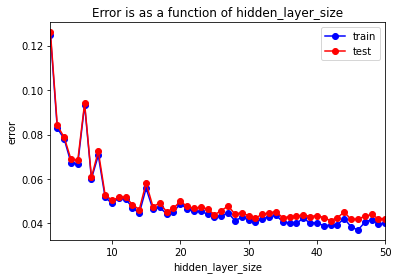

In [13]:
plt.plot(hidden_layer_size, train_err, 'b-o', label = 'train')
plt.plot(hidden_layer_size, test_err, 'r-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Error is as a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('error')
plt.legend()

print("Train: Min error={0}, number of neurons={1}".format(np.min(train_err), hidden_layer_size[np.argmin(train_err)]))
print("Test: Min error={0}, number of neurons={1}".format(np.min(test_err), hidden_layer_size[np.argmin(test_err)]))

Train: max accuracy=0.9629305177739869, number of neurons=46
Test: max accuracy=0.9586950925557558, number of neurons=42


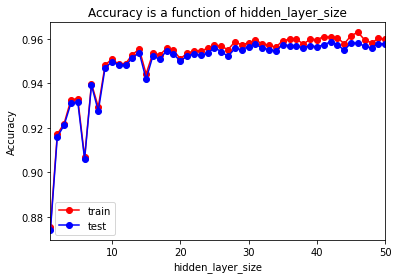

In [14]:
plt.plot(hidden_layer_size, train_acc, 'r-o', label = 'train')
plt.plot(hidden_layer_size, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(hidden_layer_size), np.max(hidden_layer_size)])
plt.title('Accuracy is a function of hidden_layer_size')
plt.xlabel('hidden_layer_size')
plt.ylabel('Accuracy')
plt.legend()

print("Train: max accuracy={0}, number of neurons={1}".format(np.max(train_acc), hidden_layer_size[np.argmax(train_acc)]))
print("Test: max accuracy={0}, number of neurons={1}".format(np.max(test_acc), hidden_layer_size[np.argmax(test_acc)]))

### 4.2 Подбор количества нейронов в двуслойной сети

In [17]:
n = 10
sizes = np.linspace(1, 50, n).astype(int)
test_err = np.zeros((n, n))
train_err = np.zeros((n, n))
train_acc = np.zeros((n, n))
test_acc = np.zeros((n, n))

for i, size_1 in tqdm(enumerate(sizes)):
    for j, size_2 in enumerate(sizes):
        model = MLPClassifier(hidden_layer_sizes=(size_1, size_2, ), 
                              solver='adam', activation='relu', max_iter=1000, random_state=13)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_err[i][j] = np.mean(y_train != y_train_pred)
        test_err[i][j] = np.mean(y_test != y_test_pred)

        train_acc[i][j] = accuracy_score(y_train, y_train_pred)
        test_acc[i][j] = accuracy_score(y_test, y_test_pred)

10it [2:02:52, 737.24s/it] 


Train: Min error=0.03187099451334778, number of neurons=45,25
Test: error=0.040064590110224424, number of neurons=45,25

Test: Min error=0.0385668484238609, number of neurons=35,10
Train: error=0.035236755959242014, number of neurons=35,10



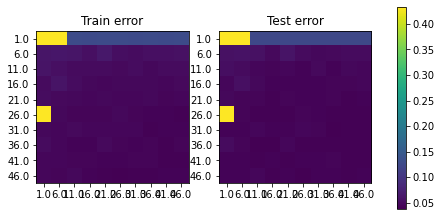

In [32]:
plt.subplot(121)
plt.title("Train error")
plt.imshow(train_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test error")
plt.imshow(test_err)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.96, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_min_loss = np.where(train_err == np.min(train_err))
test_min_loss = np.where(test_err == np.min(test_err))

train_min_loss_sizes = [train_min_loss[0][0] * 5, train_min_loss[1][0] * 5]
test_min_loss_sizes = [test_min_loss[0][0] * 5, test_min_loss[1][0] * 5]

print("Train: Min error={0}, number of neurons={1},{2}".format(np.min(train_err), train_min_loss_sizes[0], train_min_loss_sizes[1]))
print("Test: error={0}, number of neurons={1},{2}\n".format(test_err[train_min_loss][0], train_min_loss_sizes[0], train_min_loss_sizes[1]))
print("Test: Min error={0}, number of neurons={1},{2}".format(np.min(test_err), test_min_loss_sizes[0], test_min_loss_sizes[1]))
print("Train: error={0}, number of neurons={1},{2}\n".format(train_err[test_min_loss][0], test_min_loss_sizes[0], test_min_loss_sizes[1]))

Train: Max accuracy=0.9681290054866523, number of neurons=45,25
Test: accuracy=0.9599354098897755, number of neurons=45,25

Test: Max accuracy=0.9614331515761391, number of neurons=35,10
Train: accuracy=0.964763244040758, number of neurons=35,10



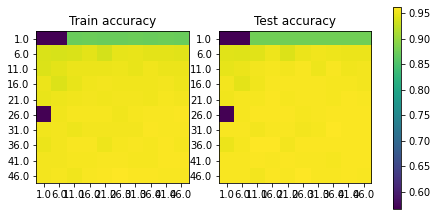

In [35]:
plt.subplot(121)
plt.title("Train accuracy")
plt.imshow(train_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

plt.subplot(122)
plt.title("Test accuracy")
plt.imshow(test_acc)
plt.xticks(np.arange(n), np.arange(1, 50, 50 / n))
plt.yticks(np.arange(n), np.arange(1, 50, 50 / n))

cax = plt.axes([0.95, 0.15, 0.02, 0.7])
plt.colorbar(cax=cax)

train_max_acc = np.where(train_acc == np.max(train_acc))
test_max_acc = np.where(test_acc == np.max(test_acc))

train_max_acc_sizes = [train_max_acc[0][0] * 5, train_max_acc[1][0] * 5]
test_max_acc_sizes = [test_max_acc[0][0] * 5, test_max_acc[1][0] * 5]

print("Train: Max accuracy={0}, number of neurons={1},{2}".format(np.max(train_acc), train_max_acc_sizes[0], train_max_acc_sizes[1]))
print("Test: accuracy={0}, number of neurons={1},{2}\n".format(test_acc[train_max_acc][0], train_max_acc_sizes[0], train_max_acc_sizes[1]))
print("Test: Max accuracy={0}, number of neurons={1},{2}".format(np.max(test_acc), test_max_acc_sizes[0], test_max_acc_sizes[1]))
print("Train: accuracy={0}, number of neurons={1},{2}\n".format(train_acc[test_max_acc][0], test_max_acc_sizes[0], test_max_acc_sizes[1]))

### 4.3 Подбор параметра регуляризации

Лучшие показатели подемонстрировала сеть из 2х слоев, причем при количесте нейронов (35,10), следовательно подбирать параметра _alpha_ будем для нее. Уточним, что переобучение или недообучение не прослеживаются, но тем не менее для чистоты эксперимента попробуем рассмотреть подбор параметра

In [36]:
alphas = np.logspace(-5, 5, 50)
test_err, train_err = [], []
train_acc, test_acc = [], []


for alpha in tqdm(alphas):
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (35,10,), 
                              solver='adam', activation='relu', max_iter=1000, random_state=13)
    
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [26:45<00:00, 32.11s/it]


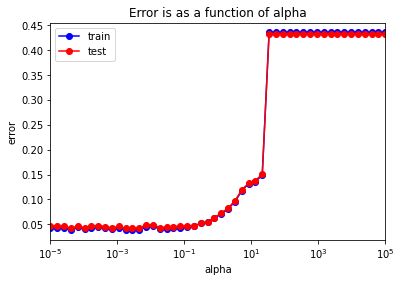

In [37]:
plt.semilogx(alphas, train_err, 'b-o', label = 'train')
plt.semilogx(alphas, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alphas), np.max(alphas)])
plt.title('Error is as a function of alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

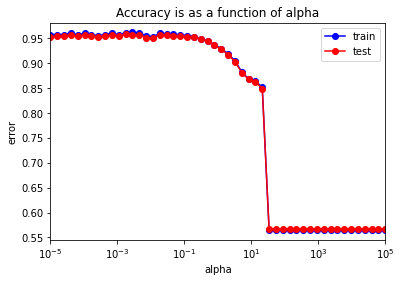

In [40]:
plt.semilogx(alphas, train_acc, 'b-o', label = 'train')
plt.semilogx(alphas, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(alphas), np.max(alphas)])
plt.title('Accuracy is as a function of alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

## 5. Выводы

### 5.1 Подбор числа нейронов в однослойном моделе
- Практически полное совпадение графиков Error/Accuracy для train/test говорит об почти одинаковом распределении тренировочных и тестовых данных.
- Переобучения и недобучения нет, что свидетельствует о том, что в модели нет высоких весовых значений и модель достаточно простая, чтобы уметь обощаться, но в то же время и достаточно сложная, чтобы решать поставленную задачу.
- За оптимальный размер скрытого слоя возьмем минимум ошибки и максимум accuracy на тестовой выборке 95.8% - 42 нейрона.
- При количестве нейронов в слое больше 2 мы уже достигаем точность больше 92%, что говорит о том, что Все входные обЪекты, которые описываются 16 признаками, могут быть спроецированы в двумерное пространство и разделены на классы с высокой точностью 92%

### 5.2 Подбор числа нейронов в двуслойной моделе
- Переобучения и недобучения также необнаружено
- За оптимальные размеры скрытых слоев возьмем минимум ошибки и максимум accuracy на тестовой выборке 96.4% - 35 и 10 нейронов.
- Заметим, что количество нейронов увеличилось больше, чем в 10 раз, а точность при этом увеличилась лишь на 0.6%. Таким образом, можно в принципе для данной задачи использовать однослойную сеть из 42 нейронов и получать хорошую точность (accuracy). Однако, если те самые 0.6% важны и количество параметров наоборот не так важно, то можно остановиться на двуслойной сети.

### 5.3 Подбор параметра регуляризации
- Заметим, что с ростом коэффициента регуляризации растет ошибка и падает accuracy, что говорит о том, что после обучения у модели не возникает больших значения весовых коэффициентов, а значит нет переобучения у модели.
- При _lambda_ > 10e-1 начинается рост ошибки и снижение accuracy. То есть с ростом _lamda_ уменьшаются веса модели и стремятся к нулю